<a href="https://colab.research.google.com/github/BooEiEi/project/blob/main/XGgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
from google.colab import drive #เชื่อม Google drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/project' #เข้า drive
data1 = pd.read_csv(os.path.join(path,'df_1.csv'))

Mounted at /content/drive


In [ ]:
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

### GridSearchCV

In [ ]:
def data(data,subsample,max_depth,n_estimators,colsample_bytree,learning_rate):
  y = data['telomere length (kb)']
  X = data.drop('telomere length (kb)',1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)
  param_tuning = {
        'learning_rate': [learning_rate],
        'max_depth': [max_depth],
        'min_child_weight': [1],
        'subsample': [subsample],
        'colsample_bytree': [colsample_bytree],
        'n_estimators' : [n_estimators],
        'seed':[216],'alpha':[0]
    }
  xgb_model = XGBRegressor()
  grid_search = GridSearchCV(estimator=xgb_model,
                            param_grid=param_tuning)
  grid_search.fit(X_train, y_train)
  y_pred = grid_search.predict(X_test)
  print('-----------------------------')
  print('Test')
  print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
  print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
  print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))
  print('MAPE',mean_absolute_percentage_error(y_test, y_pred))
  print('-----------------------------')
  sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
  sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
  plt.title('Actual vs Predicted Values', fontsize = 16)
  plt.xlabel('Values', fontsize = 12)
  plt.ylabel('Frequency', fontsize = 12)
  plt.legend(loc = 'upper left', fontsize = 13)

In [ ]:
data1.drop('Unnamed: 0',1,inplace = True)
data1

<ipython-input-5-f170cadba2e7>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data1.drop('Unnamed: 0',1,inplace = True)


,Sex,AgeSYear,Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,Fat Mass,...,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c,telomere length (kb)
0,2.0,58.0,47.200000,156.000000,19.40,112.000,64.00,70.00,19.741,13.631,...,4.8,180.0,97.0,62.0,98.0,25.0,32.0,40.0,5.800000,7.30
1,2.0,57.0,47.400000,153.000000,20.20,114.000,75.00,69.00,19.300,12.500,...,5.0,176.0,51.0,72.0,94.0,16.0,16.0,62.0,5.100000,6.36
2,2.0,24.0,53.200000,157.000000,21.60,103.000,69.00,78.00,21.300,14.600,...,5.2,159.0,45.0,52.0,98.0,13.0,17.0,50.0,5.400000,9.71
3,2.0,62.0,54.400000,165.000000,20.00,95.000,75.00,83.00,21.600,15.200,...,4.1,230.0,94.0,61.0,151.0,18.0,31.0,76.0,5.600000,6.17
4,2.0,86.0,49.000000,154.000000,20.70,129.000,79.00,83.00,19.907,15.369,...,5.4,183.0,86.0,39.0,127.0,12.0,22.0,82.0,6.200000,4.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,2.0,25.0,47.000000,165.000000,17.30,104.000,63.00,89.00,20.387,12.852,...,4.8,232.0,36.0,96.0,128.0,18.0,12.0,46.0,5.393333,8.98
418,2.0,31.0,72.200000,168.000000,25.60,123.000,89.00,69.00,25.451,18.258,...,6.1,187.0,49.0,51.0,127.0,21.0,24.0,71.0,5.186667,8.23
419,2.0,32.0,54.500000,158.466667,21.68,113.160,71.83,72.30,22.707,21.599,...,5.1,222.0,58.0,79.0,132.0,17.0,10.0,34.0,5.486667,8.79
420,1.0,29.0,63.073333,168.866667,22.04,108.465,71.96,83.95,27.607,20.258,...,6.8,140.0,92.0,48.0,73.0,31.0,75.0,69.0,4.973333,8.93


In [ ]:
scaler = MinMaxScaler()
Scaler = scaler.fit_transform(data1)

In [ ]:
df = pd.DataFrame(Scaler, columns = ['Sex' , 'AgeSYear', 'telomere length (kb)','Weight','Height','BMI','Systolic','Diastolic','HeartRate','SMM','Fat Mass',
                                       '% Body fat','waist to hip radio','abdominal circumference','visceral fat area','Glucose','BUN','Creatinine','Uric Acid','Cholesterol',
                                       'Triglyceride','HDL-C','LDL','AST','ALT','Alkaline Phos','HbA1c'])

<ipython-input-4-8048306b879f>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('telomere length (kb)',1)


-----------------------------
Test
R2 Value Test: 0.9777283077522063
MSE Test: 0.0006614013698898305
MAE Test: 0.017412208296353412
MAPE 0.062006924596417996
-----------------------------


<ipython-input-4-8048306b879f>:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
<ipython-input-4-8048306b879f>:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Va

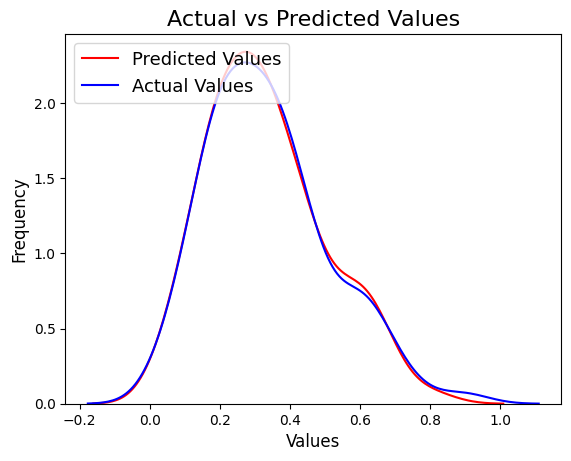

In [ ]:
data(df,0.5,3,1000,0.7,0.05)

data2

In [ ]:
data2 = pd.read_csv(os.path.join(path,'df_2.csv'))
data2.drop('Unnamed: 0',1,inplace = True)

<ipython-input-9-9295e0cecbd9>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data2.drop('Unnamed: 0',1,inplace = True)


In [ ]:
scaler = MinMaxScaler()
Scaler = scaler.fit_transform(data2)

In [ ]:
df = pd.DataFrame(Scaler, columns = ['Sex' , 'AgeSYear', 'telomere length (kb)','Weight','Height','BMI','Systolic','Diastolic','HeartRate','SMM','Fat Mass',
                                       '% Body fat','waist to hip radio','abdominal circumference','visceral fat area','Glucose','BUN','Creatinine','Uric Acid','Cholesterol',
                                       'Triglyceride','HDL-C','LDL','AST','ALT','Alkaline Phos','HbA1c'])

<ipython-input-4-8048306b879f>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('telomere length (kb)',1)


-----------------------------
Test
R2 Value Test: 0.9695549911635132
MSE Test: 0.0009070064803317239
MAE Test: 0.01965005779487696
MAPE 0.07114356972289972
-----------------------------


<ipython-input-4-8048306b879f>:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
<ipython-input-4-8048306b879f>:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Va

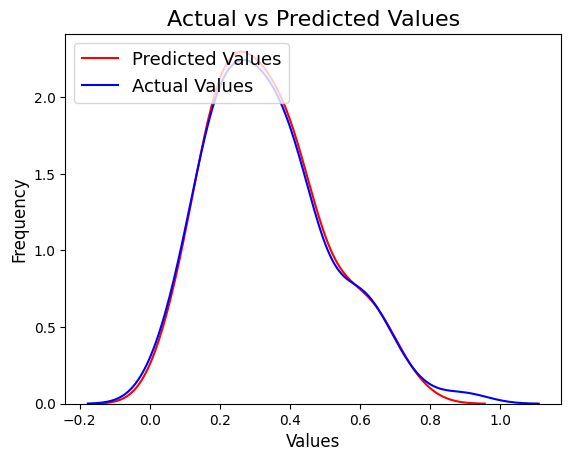

In [ ]:
data(df,0.5,3,1000,0.7,0.1)

con

In [ ]:
data_file_path = os.path.join(path,'df_control.csv') #ไปที่ไฟล์ confirmed-cases-since-280265.csv
data3 = pd.read_csv(data_file_path)
data3.drop({'Unnamed: 0'},1,inplace = True)

<ipython-input-13-bf1a70202b09>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data3.drop({'Unnamed: 0'},1,inplace = True)


In [ ]:
scaler = MinMaxScaler()
Scaler = scaler.fit_transform(data3)

In [ ]:
df = pd.DataFrame(Scaler, columns = ['Sex' , 'AgeSYear', 'telomere length (kb)','Weight','Height','BMI','Systolic','Diastolic','HeartRate','SMM','Fat Mass',
                                       '% Body fat','waist to hip radio','abdominal circumference','visceral fat area','Glucose','BUN','Creatinine','Uric Acid','Cholesterol',
                                       'Triglyceride','HDL-C','LDL','AST','ALT','Alkaline Phos','HbA1c'])

<ipython-input-4-8048306b879f>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('telomere length (kb)',1)


-----------------------------
Test
R2 Value Test: 0.7147668364071118
MSE Test: 0.01792642904016454
MAE Test: 0.1051869160452197
MAPE 0.24408743038609515
-----------------------------


<ipython-input-4-8048306b879f>:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
<ipython-input-4-8048306b879f>:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Va

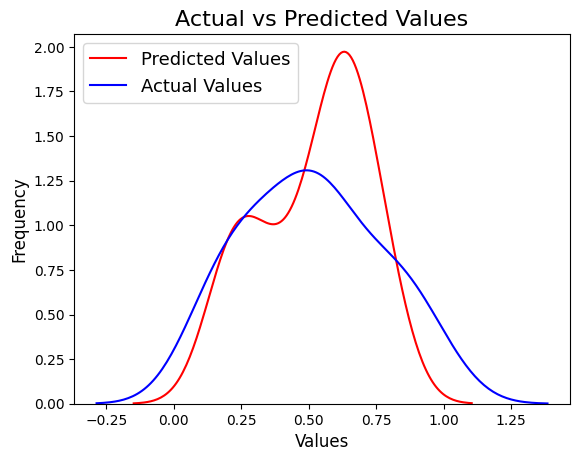

In [ ]:
data(df,0.5,5,100,0.9,0.3)